<a href="https://colab.research.google.com/github/addriadrie/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

# Importing libraries 🐍

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset 📁

In [137]:
df = pd.read_csv("house_prices.csv")

In [138]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
315,4095000,5600,2,1,1,yes,no,no,no,yes,0,no,semi-furnished
476,2940000,5850,3,1,2,yes,no,yes,no,no,1,no,unfurnished
204,4900000,4770,3,1,1,yes,yes,yes,no,no,0,no,semi-furnished
46,7525000,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
112,6083000,4300,6,2,2,yes,no,no,no,no,0,no,furnished
101,6230000,5500,3,1,3,yes,no,no,no,no,1,yes,unfurnished
145,5600000,5000,3,1,4,yes,no,no,no,no,0,no,furnished
445,3150000,3450,1,1,1,yes,no,no,no,no,0,no,furnished
353,3780000,2856,3,1,3,yes,no,no,no,no,0,yes,furnished
168,5250000,4260,4,1,2,yes,no,yes,no,yes,0,no,furnished


In [139]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [140]:
df.shape # data shape

(545, 13)

In [141]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [142]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [143]:
df.duplicated().sum() # duplicate values check

0

In [144]:
data=df.copy()

#### 1. Create a scatter plot

- the x axis should be the area
- the y axis should be the price
- the color of each data point should be based on the furnishing status


<Axes: xlabel='area', ylabel='price'>

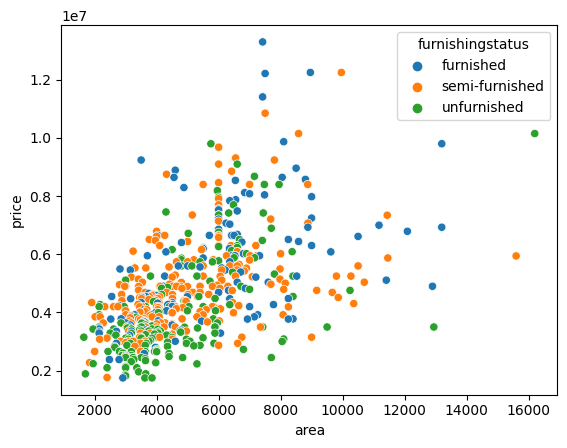

In [145]:
# Put your answer here
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

#### 2. Apply the `get_dummies()` method to the categorical columns below.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [146]:
# Put your answer here
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)

#### 3. Drop the categorical columns below.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [147]:
# Put your answer here
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,prefarea,furnishingstatus,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,yes,furnished,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,no,furnished,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,yes,semi-furnished,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,yes,furnished,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,no,furnished,0,0,1,1,1,0,1,0


#### 4. Split the data set into a training and test set

In [150]:
# Put your answer here
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,prefarea,furnishingstatus,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,yes,furnished,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,no,furnished,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,yes,semi-furnished,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,yes,furnished,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,no,furnished,0,0,1,1,1,0,1,0


#### 4. Use the the `MinMaxScaler()` method to scale down the training and test set.

In [161]:
# Put your answer here
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: ignored

#### 5. Create a new instance of a Linear Regression model  

In [152]:
# Put your answer here
model = LinearRegression()

#### 6. Use the `fit()` method to train your model using the training set.

In [155]:
# Put your answer here
model.fit(X_train_scaled, y_train)

LinearRegression()

#### 7. Use the `predict()` method using the test set

In [156]:
y_pred = model.predict(X_test_scaled)

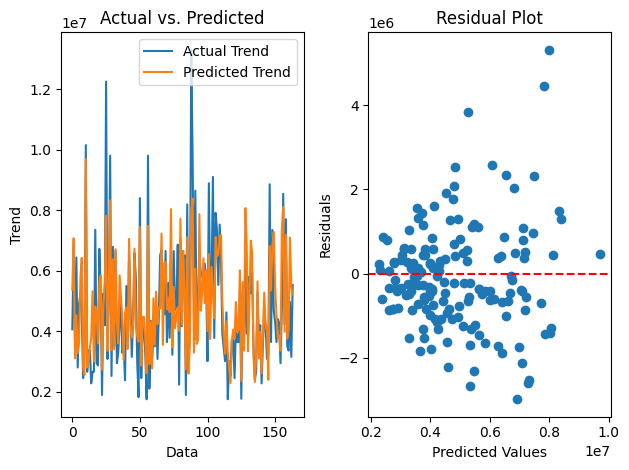

In [154]:
# Put your answer here
# Plot Actual vs. Predicted values
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual vs. Predicted')

# Plot Residuals
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

#### 7. Get the R2 Score

In [157]:
# Put your answer here
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score : {r2}")

R2 Score : 0.6463350878895878


8. #### Use the normal equation to get the optimal slope and intercept

In [164]:
# Put your answer here
def linear_regression_normal_equation(X, y):

    ones = np.ones((X.shape[0], 1))
    X = np.append(ones, X, axis=1)

    result = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return result, result[0], result[1:]

In [165]:
result, b, m = linear_regression_normal_equation(X, y)

print("result: ", result)
print("intercept:", b)
print("slopes/coefficients:", m)

TypeError: ignored